# Лабораторная работа №2

ФИО:Табуринский Яков Андреевич 
Группа:БИВТ-21-4 

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6 в семестре (Занятие №2 очное)

Что необходимо сделать:  
**В общих чертах просто провести EDA** (но обычно это не бывает просто)
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/11600OkqdRzxc-xZmFTuBs099VeAqU_GlE0Bx6bBlIRE/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить. 
7. Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  
9. _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap. 

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

## 0. Пример импорта данных

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('https://github.com/TaburinskyYakov1/Taburinsky_Yakov_BIVT-21-4/raw/main/insurance.csv')

## 2. Описание постановки задачи

**Age:** возраст;  
**Sex:** пол;  
**Bmi:** индекс массы тела;  
**Children:** количество детей;  
**Smoker:** наличие вредной привычки (курения);  
**Region:** район проживания;  
**Charges:** индивидуальные раходы.

Предсказать стоимость страховки (Charges) и понять, какие признаки (Age, BMI, Children) оказывают на неё наиболее сильное влияние.

## 3. Распределение целевой переменной  

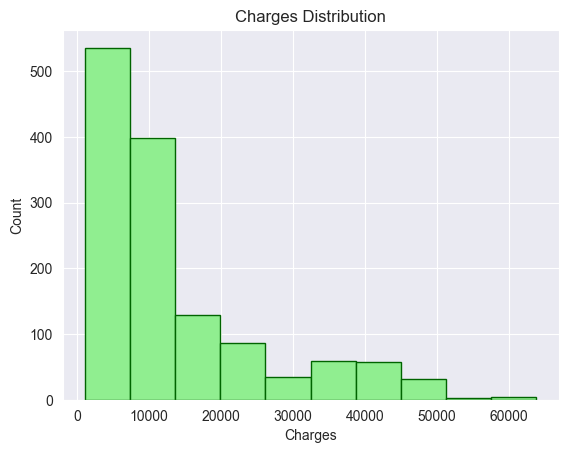

In [35]:
plt.hist(data['charges'], bins=10, color='lightgreen', edgecolor='darkgreen')
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()


Гистограмма распределения индивидуальных медицинских расходов не является симметричной и не следует нормальному распределению. Распределение затрат смещено вправо, что указывает на то, что большинство случаев страхования имеют относительно невысокие затраты в диапазоне от 5000 до 13000 долларов. Однако существует небольшое количество случаев, где затраты значительно превышают данную область, что создает неравномерность в размере выплат страхователей.

На гистограмме наблюдаются два "пика" частот, что указывает на то, что значения переменной сосредоточены в нескольких интервалах, что делает распределение неравномерным.

In [36]:
print(f'Количество уникальных значений целевой функции: {data["charges"].nunique()}')
print(f'Количество дубликатов значений целевой функции: {data["charges"].duplicated().sum()}')

Количество уникальных значений целевой функции: 1337
Количество дубликатов значений целевой функции: 1


## 4. Основные статистики по переменным

In [37]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 5. Основная информация

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 6. Количество пропусков

In [39]:
data.isna().sum() #по каждому столбцу
data.isna().sum().sum() #общее

0

## 7. Гистограммы

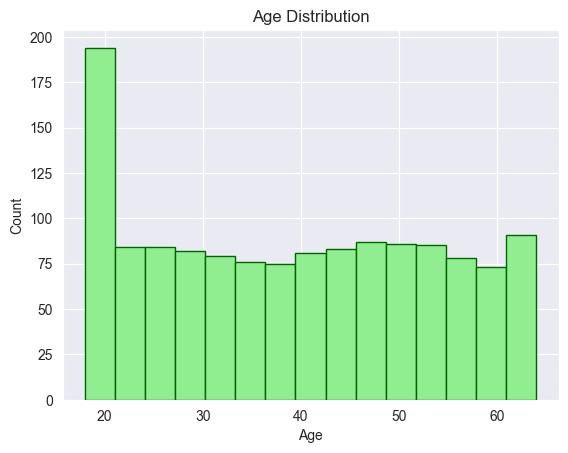

In [40]:
plt.hist(data['age'], bins=15, color='lightgreen', edgecolor='darkgreen')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Гистограмма демонстрирует некоторую асимметрию в распределении. Форма распределения может быть характеризована как «случайная», поскольку у данных нет четкой стройности. Однако важно отметить, что наибольшее количество страховых случаев приходится на возрастную группу от 18 до 22 лет.


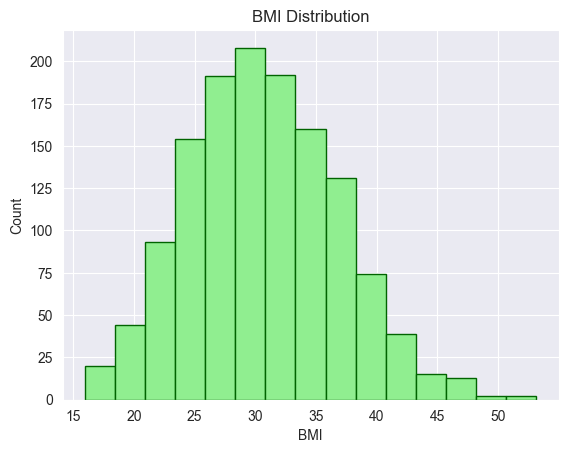

In [41]:
plt.hist(data['bmi'], bins=15, color='lightgreen', edgecolor='darkgreen')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

Анализируя вторую гистограмму, можно отметить, что значения индекса массы тела равномерно распределены относительно среднего значения, что свидетельствует о симметричности. Также стоит отметить отсутствие явных выбросов и склонность распределения к более плотному скоплению вокруг средней точки, что может указывать на то, что данное распределение приближается к нормальному.

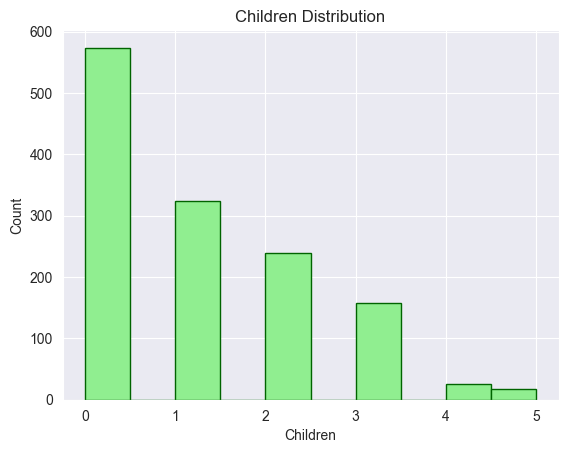

In [42]:
plt.hist(data['children'], color='lightgreen', edgecolor='darkgreen')
plt.title('Children Distribution')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()


Гистограмма несимметрична, смещена вправо. Распределение страхователей по количеству детей схоже с распределением целевой переменной. Это указывает на возможную важность этого признака при прогнозировании целевой переменной.

## 8. Графики зависимости

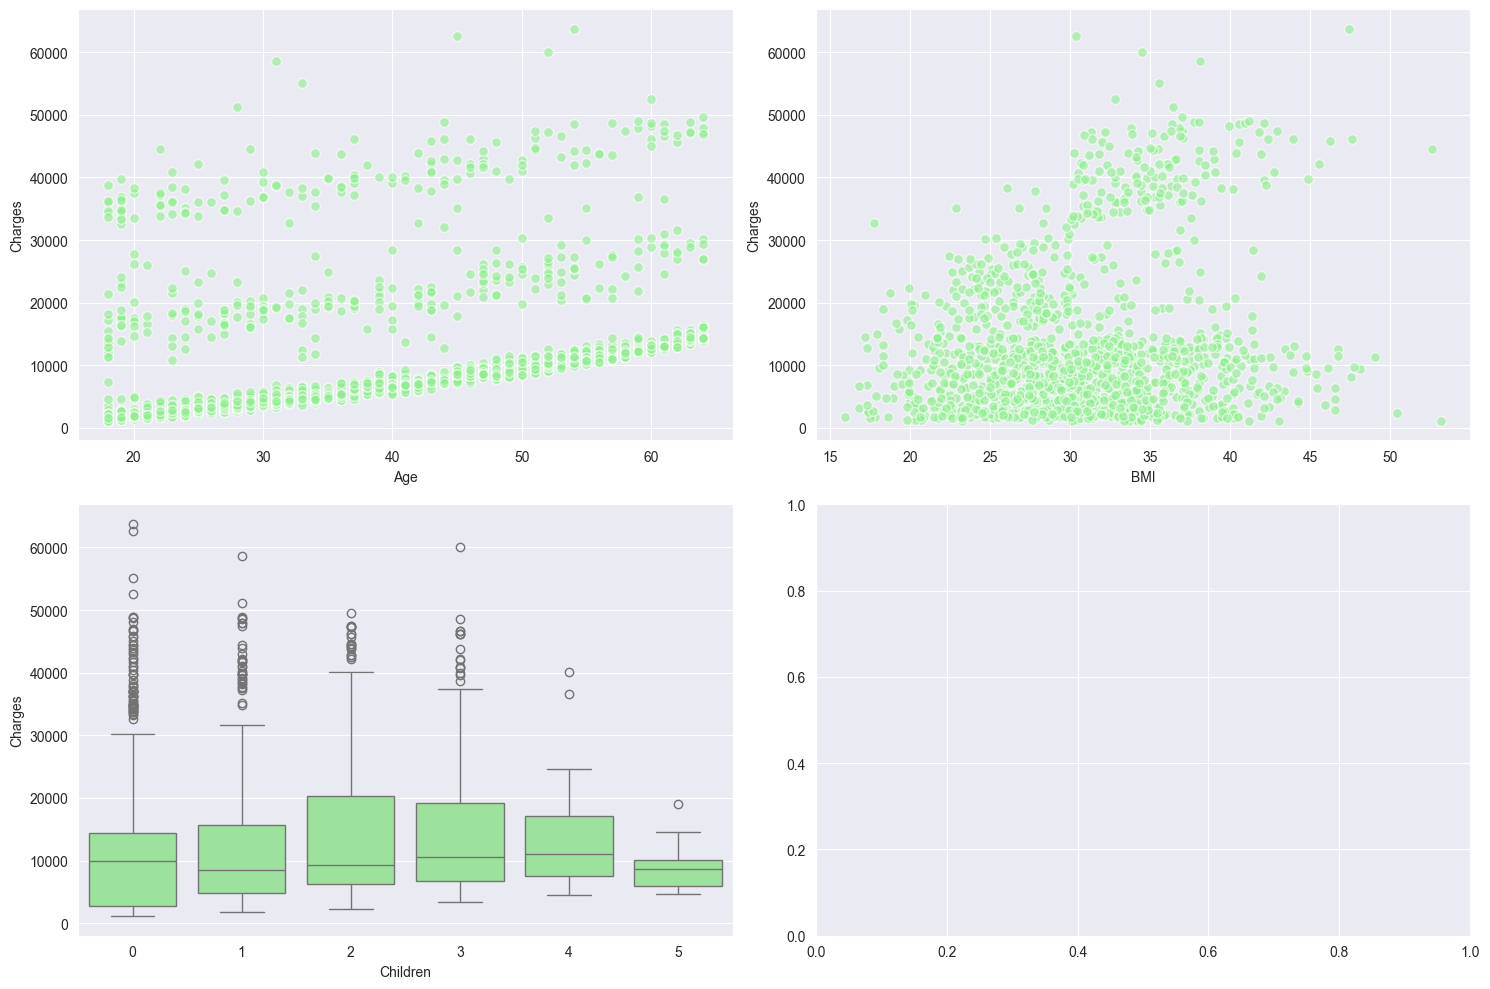

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

scatter_kwargs = {
    's': 50,
    'alpha': 0.6,
    'c': 'lightgreen',
    'edgecolors': 'w'
}

axs[0, 0].scatter(data['age'], data['charges'], **scatter_kwargs)
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Charges')

axs[0, 1].scatter(data['bmi'], data['charges'], **scatter_kwargs)
axs[0, 1].set_xlabel('BMI')
axs[0, 1].set_ylabel('Charges')

sns.boxplot(x='children', y='charges', data=data, ax=axs[1, 0], color='lightgreen')
axs[1, 0].set_xlabel('Children')
axs[1, 0].set_ylabel('Charges')


plt.tight_layout()
plt.show()

Age: Показывает выраженную положительную корреляцию между возрастом и расходами. С возрастом люди обычно тратят больше на медицинское обслуживание, и она увеличивается по мере старения. Тем не менее, среди различных возрастных групп есть значительные различия в уровне расходов.

BMI: Также отражает положительную связь с расходами. У людей с BMI выше 35 обычно наблюдаются более высокие расходы по сравнению с теми, у кого BMI ниже этой отметки. В то же время, большинство людей имеют BMI ниже 35, поэтому эта закономерность не распространяется на всех.

Children: Показывает заметную обратную зависимость от расходов. У людей без детей как правило расходы на медицину выше, чем у родителей. Это может быть связано с различными факторами, включая степень страхования и обслуживания.

## 9. Зависимость двух переменных от целевой переменной

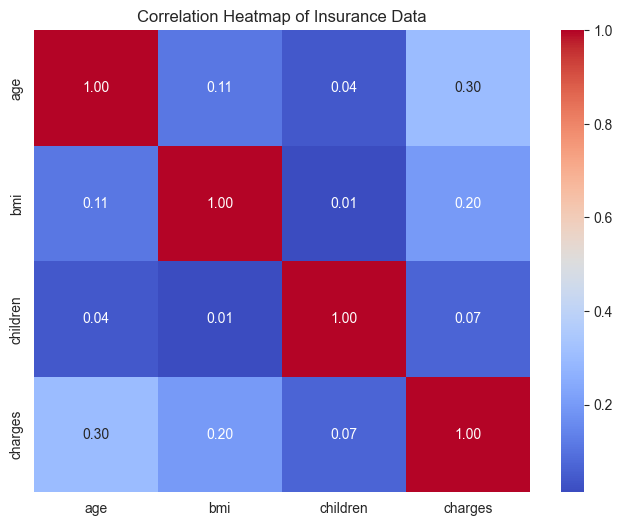

In [44]:
import seaborn as sns

num_columns = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = num_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Correlation Heatmap of Insurance Data')
plt.show()